In [1]:
from graphstats import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [24]:
n = 100
mu1 = -1
mu2 = 1
s1= 1.25
s2 = 0.75
X1 = np.random.normal(mu1, s1, n)
X2 = np.random.normal(mu2, s2, n)


In [27]:
x_minus, x_plus = decision_boundary(0.5, mu1, mu2, s1, s2)

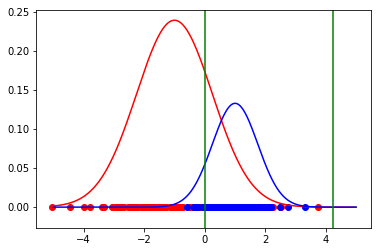

In [44]:
# "EMBEDDING"
xs = np.arange(-5, 5, step = 0.01)
fig, ax = plt.subplots(1,1)
ax.scatter(X1, np.zeros(n), c = 'r')
ax.plot(xs, 0.75*norm.pdf(xs, mu1, s1), c = 'r')
ax.scatter(X2, np.zeros(n), c = 'b')
ax.plot(xs, 0.25*norm.pdf(xs, mu2, s2), c = 'b')
ax.axvline(x = x_minus, c = 'g')
ax.axvline(x = x_plus, c = 'g')


In [ ]:
# "EDGE WEIGHTS"
# ASSUME ORDER ASSUMPTION IS KNOWN AND THAT O_{1} = (1, 2) and O_{2} = (2, 1) meaning mu1 < mu2 
np.random.seed(1)
m = 50
for i in range(100):
    Z1 = np.random.normal(0, 4, m)
    Z2 = np.random.normal(1, 6, m)
    ZHat1 = np.mean(Z1)
    ZHat2 = np.mean(Z2)
    if ZHat1 < ZHat2:
        pi1 = 3/4
    else:
        pi1 = 1/4
    pi2 = 1 - pi1
    x_minus, x_plus = decision_boundary(pi1, -1, 1, 0.75, 1.25)

In [17]:
def decision_boundary(pi1, mu1, mu2, s1, s2):
    var1 = s1**2
    var2 = s2**2
    
    neg_b = mu2*var1 - mu1*var2
    disc1 = (mu2*var1 - mu1*var2)**2
    disc2 = (var1 - var2)*(mu2**2 * var1 - mu1**2 * var2 + 2*var1*var2*np.log(pi1*s2/((1 - pi1)*s1)))
    disc = disc1 - disc2
    sqrt_disc = np.sqrt(disc)
    
    a = var1 - var2
    
    x_plus = (neg_b + sqrt_disc)/a
    x_minus = (neg_b - sqrt_disc)/a
    
    return x_minus, x_plus

In [53]:
def delta(theta1, theta2, s1, s2, n1, n2):
    var_theta1 = s1**2 / n1
    var_theta2 = s2**2 / n2
    std = np.sqrt(var_theta1 + var_theta2)
    delta1 = 1 - norm.cdf((theta1 - theta2)/std, 0, 1)
    
    return delta1

In [54]:
# check if this is right..

def new_error(mu1, mu2, s1, s2, delta):
    x_minus1, x_plus1 = decision_boundary(0.75, mu1, mu2, s1, s2)
    x_minus2, x_plus2 = decision_boundary(0.25, mu1, mu2, s1, s2)
    
    error_correct1 = 0.5*(norm.cdf(x_plus1, mu1, s1) - norm.cdf(x_minus1, mu1, s1))
    error_correct2 = 0.5*(norm.cdf(x_minus2, mu2, s1) + 1 - norm.cdf(x_plus2, mu2, s2))
    error_correct = error_correct1 + error_correct2
    
    error_incorrect1 = 0.5*(norm.cdf(x_plus2, mu1, s1) - norm.cdf(x_minus2, mu1, s1))
    error_incorrect2 = 0.5*(norm.cdf(x_plus1, mu2, s2) + 1 - norm.cdf(x_minus1, mu2, s2))
    error_incorrect = error_incorrect1 + error_incorrect2
    
    return delta*error_correct + (1 - delta)*error_incorrect

In [89]:
mu1 = 0
mu2 = 2
s1= 11
s2 = 1

error_og1 = 0.5*(norm.cdf(x_plus, mu1, s1) - norm.cdf(x_minus, mu1, s1))
error_og2 = 0.5*(norm.cdf(x_minus, mu2, s2) + (1 - norm.cdf(x_plus, mu2, s2)))
error_og = error_og1 + error_og2

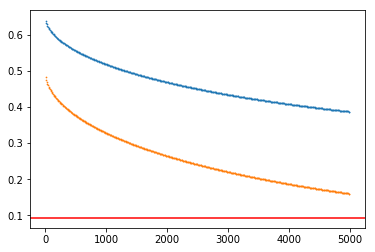

In [90]:
ns = 10*np.arange(1, 500)
errors = []
deltas = []
for i in ns:
    delta_ = delta(0, 2, 101, 100, i, i)
    deltas.append(delta_)
    error_ = new_error(mu1, mu2, s1, s2, delta_)
    errors.append(error_)
    
fig, ax = plt.subplots(1,1)
ax.scatter(ns, errors, s = 0.5, label = "Updated priors expected error")
ax.axhline(y = error_og, c = 'r', label = "Oracle Bayes")
ax.scatter(ns, 1 - np.array(deltas), s = 0.5)